In [38]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess
import psfex

In [3]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)

In [4]:
x = np.linspace(201, 4700, 20) + 2500
y = np.linspace(201, 4700, 20) + 2500
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

In [5]:
star_catalog = copy.deepcopy(catalog[:400])
star_catalog[:] = 0
mag = 30  - 2.5 * np.log10(5e4)

In [15]:
star_catalog["X"] = xx 
star_catalog["Y"] = yy
star_catalog["FLUX_G"][:] = 5e4
star_catalog["FLUX_R"][:] = 5e4
star_catalog["FLUX_I"][:] = 5e4
star_catalog["FLUX_Z"][:] = 5e4
star_catalog["TSIZE"][:] = 0
star_catalog["MAG_G"][:] = mag
star_catalog["MAG_R"][:] = mag
star_catalog["MAG_I"][:] = mag
star_catalog["MAG_Z"][:] = mag
star_catalog["FRACDEV"][:] = mag


In [16]:
name = 'star_canvas'
print(name)
fr = frame.Frame(star_catalog, name=name, noise_std=4)
fr.render()
fr.extract()

star_canvas
starting xshear calculations in 100 processes
sex star_canvas.fits -c config.sex -CATALOG_NAME star_canvas_cat.fits -CHECKIMAGE_NAME star_canvas_seg.fits


In [17]:
! sex star_canvas.fits -c config.sex -CATALOG_TYPE FITS_LDAC -CATALOG_NAME star_canvas_cat.ldac -CHECKIMAGE_NAME star_canvas_000_seg.ldac

> 
----- SExtractor 2.25.0 started on 2022-10-10 at 17:23:25 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for star_canvas.fits
----- Measuring from: star_canvas.fits
      "Unnamed" / no ext. header / 5000x5000 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up b

> Line: 1675  Objects:      140 detected /       60 sextracted
> Line: 1700  Objects:      140 detected /       60 sextracted
> Line: 1725  Objects:      140 detected /       60 sextracted
> Line: 1750  Objects:      140 detected /       60 sextracted
> Line: 1775  Objects:      140 detected /       60 sextracted
> Line: 1800  Objects:      140 detected /       60 sextracted
> Line: 1825  Objects:      140 detected /       60 sextracted
> Line: 1850  Objects:      140 detected /       60 sextracted
> Line: 1875  Objects:      160 detected /       60 sextracted
> Line: 1900  Objects:      160 detected /       63 sextracted
> Line: 1925  Objects:      160 detected /       80 sextracted
> Line: 1950  Objects:      160 detected /       80 sextracted
> Line: 1975  Objects:      160 detected /       80 sextracted
> Line: 2000  Objects:      160 detected /       80 sextracted
> Line: 2025  Objects:      160 detected /       80 sextracted
> Line: 2050  Objects:      160 detected /       80 sex

> Line: 4775  Objects:      400 detected /      320 sextracted
> Line: 4800  Objects:      400 detected /      320 sextracted
> Line: 4825  Objects:      400 detected /      320 sextracted
> Line: 4850  Objects:      400 detected /      320 sextracted
> Line: 4875  Objects:      400 detected /      320 sextracted
> Line: 4900  Objects:      400 detected /      320 sextracted
> Line: 4925  Objects:      400 detected /      320 sextracted
> Line: 4950  Objects:      400 detected /      320 sextracted
> Line: 4975  Objects:      400 detected /      320 sextracted
> Line: 5000  Objects:      400 detected /      340 sextracted
      Objects: detected 400      / sextracted 400             

> Closing files
> 
> All done (in 1.6 s: 3093.7 lines/s , 247.5 detections/s)


In [ ]:
fr.scat[""]

In [25]:
fr.scat["FWHM_WORLD"].mean()

0.0002497271

In [26]:
fr.scat['SNR_WIN'].mean()

2423.6338

In [35]:
fr.scat["VIGNET"].max()

3650.938

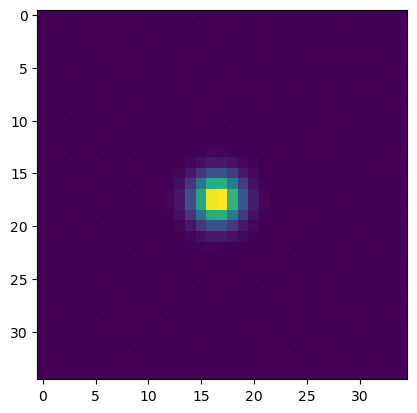

In [32]:
plt.imshow(fr.scat["VIGNET"][5])

In [36]:
!psfex star_canvas_cat.ldac -c psfex.config


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

.
----- PSFEx 3.21.1 started on 2022-10-10 at 17:59:09 with 160 threads

.
----- 1 input catalogues:
star_canvas_cat.ldac:  "no ident        "    1 extension     400 detections

Initializing contexts....
Computing optimum PSF sampling steps....
Reading data from star_canvas_cat....
Computing final PSF model for star_canvas_cat....
Computing diagnostics for star_canvas_cat....
star_canvas_cat            398/400     0.75   1.08   3.35  0.00  0.02  0.41
Saving CHECK-image #1....
Saving CHECK-image #2....
Saving CHECK-image #3....
Saving CHECK-image #4....
Saving CHECK-image #5....
Saving PSF model and metadata for star_canvas_cat....
Writing XML file....
.


In [ ]:
import psfex

row=514.25
col=610.00
pex = psfex.PSFEx(filename)
image = pex.get_rec(row, column)

In [37]:
fio.read('star_canvas_cat.psf')

array([([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.97251197e-07,  1.29021157e-06,  1.62895390e-06,  1.15508055e-06, -1.16627712e-06, -1.67673852e-06, -1.31669012e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.54158703e-07, -1.91257141e-06, -1.56648662e-06,  1.93993378e-06,  4.35797256e-06,  3.21401990e-06, -6.82182133e-07, -5.38451877e-06, -4.60563251e-06,  1.37501934e-06,  9.28599889e-07,  5.90769105e-07,  1.54970422e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  

In [25]:
ff = fio.FITS('canvas_000_cat.ldac')

In [30]:
51 / 41

1.2439024390243902

In [ ]:
imcat_ldac_name=imagefile.replace('.fits','_cat.ldac')

        bkgname=imagefile.replace('.fits','.sub.fits')
        bkg_arg = '-CHECKIMAGE_NAME ' + bkgname

        cmd = ' '.join(['sex',imagefile,'-WEIGHT_IMAGE',weightfile,'-c',sextractor_config_file,'-CATALOG_NAME ',
                            imcat_ldac_name, bkg_arg, sextractor_param_arg,sextractor_nnw_arg,sextractor_filter_arg])

(array([ 68.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 893.]),
 array([-1.000000e+30, -9.000000e+29, -8.000000e+29, -7.000000e+29,
        -6.000000e+29, -5.000000e+29, -4.000000e+29, -3.000000e+29,
        -2.000000e+29, -1.000000e+29,  8.145627e+01], dtype=float32),
 <BarContainer object of 10 artists>)

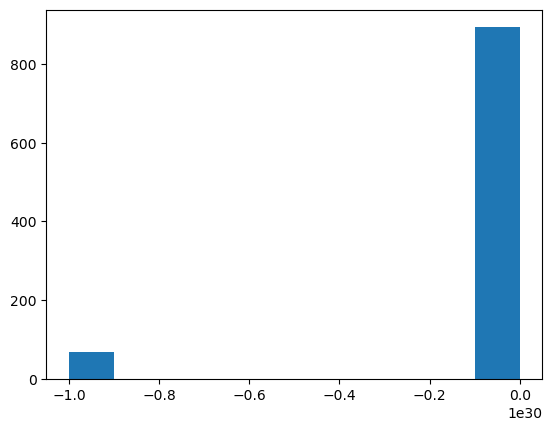

In [19]:
plt.hist(fr.scat['VIGNET'][0].flatten())

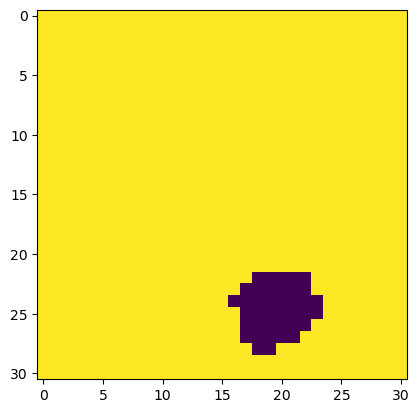

In [15]:
plt.imshow(fr.scat['VIGNET'][8])